In [210]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit
from scipy import stats
from scipy import optimize
from scipy.special import factorial
from scipy.stats import poisson

In [211]:
Excel=pd.ExcelFile("Datos/practica1Avanzado.xlsx")
Excel.sheet_names

['Hoja1',
 'Conteos_Distribución',
 'Conteos_Distancia_doble',
 'Conteos_Distancia_una',
 'Voltaje',
 'Exp_Voltaje_VS_Conteos',
 'intensidad',
 'Hoja2',
 'Conteos_intensidad']

In [212]:
conteos=pd.read_excel(Excel,sheet_name='Conteos_Distribución')

In [213]:
cuentas_verde=np.array(conteos["conteo filtro verde doble rendija en el medio"].dropna())

In [214]:
cuentas_verde=np.append(cuentas_verde,np.random.poisson(23,80))

In [215]:
datos=pd.DataFrame({"Conteos":cuentas_verde}) 

In [216]:
def poisson_dist(k,Lambda):
    #lambda es avg(n) y k = n
    return np.exp(-Lambda)*np.power(Lambda,k)/factorial(k)

In [217]:
def p(n,avg):
    return 1.0/(avg+1)*(avg/(avg+1))**n

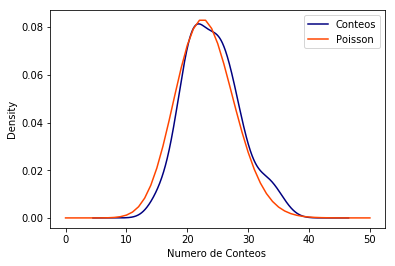

In [218]:
ax=datos.plot(kind="kde",c="navy")
#datos.hist(density=True,ax=ax,bins=10,grid=False)
dist=poisson(23)
n=np.linspace(0,50,51)
plt.plot(n,dist.pmf(n),label="Poisson",c="orangered")
plt.xlabel("Numero de Conteos ")
plt.legend()
plt.show()

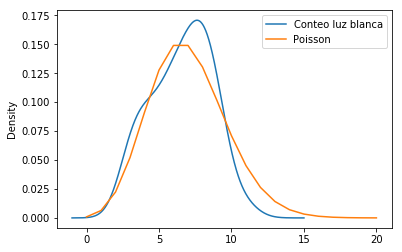

In [219]:
conteos["Conteo luz blanca"].plot(kind="kde")
dist=poisson(7)
n=np.linspace(0,20,21)
plt.plot(n,dist.pmf(n),label="Poisson")
plt.legend()
plt.savefig("Figuras/Distribución.png")
plt.show()

In [220]:
conteos=pd.read_excel(Excel,sheet_name='Conteos_intensidad')
mean=conteos.groupby("intensidad ").mean().reset_index()
mean.columns=["Intensidad","Mean"]
mean_sqrt=np.sqrt(conteos.groupby("intensidad ").mean()).reset_index()
mean_sqrt.columns=["Intensidad","Mean sqrt"]
std=conteos.groupby("intensidad ").std().reset_index()
std.columns=["Intensidad","Std"]
total=pd.merge(mean,std,on="Intensidad")
total=pd.merge(total,mean_sqrt,on="Intensidad")
total["Log std"]=np.log(total["Std"])

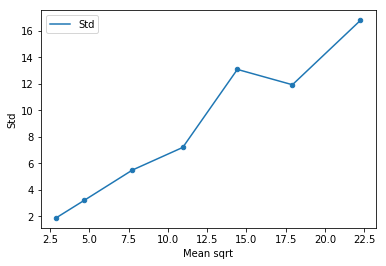

In [221]:
ax=total.iloc[:-2].plot("Mean sqrt","Std",kind="scatter")
total.iloc[:-2].plot("Mean sqrt","Std",ax=ax)
plt.show()

In [222]:
sqrt_mean=np.array(total["Mean sqrt"].iloc[:-2])
Std=np.array(total["Std"].iloc[:-2])

In [223]:
def model(x,a,b):
    return a*x+b

In [224]:
x_obs=sqrt_mean
y_obs=Std
x=np.linspace(min(x_obs),max(x_obs))
popt, pcov = curve_fit(model, x_obs, y_obs)
perr = np.sqrt(np.diag(pcov))
R_2=np.abs(pcov[1,0]/np.sqrt(pcov[0,0]*pcov[1,1]))

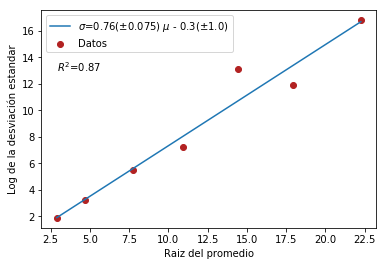

In [225]:
plt.scatter(sqrt_mean,Std,color="firebrick",label="Datos")
#total.plot("Mean sqrt","Log std",ax=ax)
plt.plot(x,model(x,popt[0],popt[1]),label=r"$\sigma$={}($\pm${}) $\mu$ {} {}($\pm${})".format(round(popt[0],2),
                                                                                round(perr[0],3),"+" if popt[1]>0 else "-",
                                                                                round(np.abs(popt[1]),2),round(perr[1],1)))
plt.text(min(x_obs), 0.77*max(y_obs), r'$R^2$={}'.format(round(R_2,3)))
plt.legend()
plt.xlabel("Raiz del promedio")
plt.ylabel("Log de la desviación estandar")
#plt.savefig("Figuras/sqrt_promedio_std.png")
plt.show()

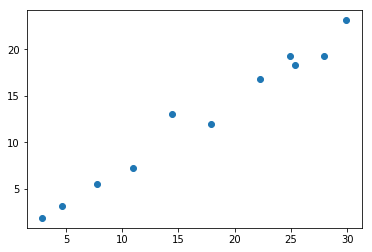

In [226]:
sqrt_mean=np.array(total["Mean sqrt"].iloc[:-2])
Std=np.array(total["Std"].iloc[:-2])
rr=np.random.uniform(23,36,4)
sqrt_mean=np.append(sqrt_mean,rr)
Std=np.append(Std,model(rr,0.76,-0.1)+np.random.normal(0,2,len(rr)))
plt.scatter(sqrt_mean,Std)

In [227]:
x_obs=sqrt_mean
y_obs=Std
x=np.linspace(min(x_obs),max(x_obs))
popt, pcov = curve_fit(model, x_obs, y_obs)
perr = np.sqrt(np.diag(pcov))
R_2=np.abs(pcov[1,0]/np.sqrt(pcov[0,0]*pcov[1,1]))

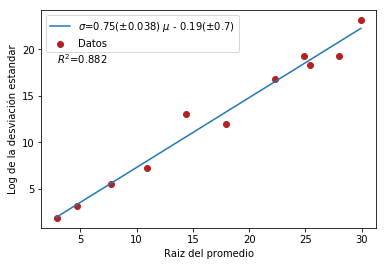

In [228]:
plt.scatter(sqrt_mean,Std,color="firebrick",label="Datos")
#total.plot("Mean sqrt","Log std",ax=ax)
plt.plot(x,model(x,popt[0],popt[1]),label=r"$\sigma$={}($\pm${}) $\mu$ {} {}($\pm${})".format(round(popt[0],2),
                                                                                round(perr[0],3),"+" if popt[1]>0 else "-",
                                                                                round(np.abs(popt[1]),2),round(perr[1],1)))
plt.text(min(x_obs), 0.8*max(y_obs), r'$R^2$={}'.format(round(R_2,3)))
plt.legend()
plt.xlabel("Raiz del promedio")
plt.ylabel("Log de la desviación estandar")
plt.savefig("Figuras/sqrt_promedio_std.png")
plt.show()

In [229]:
d={"Intensidad":np.append(np.array(total.Intensidad),[11,12]),"Promedio":sqrt_mean**2,"Sqrt promedio":sqrt_mean,"Std":Std}

In [230]:
patos=pd.DataFrame(d)

In [231]:
patos.to_csv("Datos/Promedios.csv",index=False)
datos.to_csv("Datos/Conteos_verde.csv",index=False)